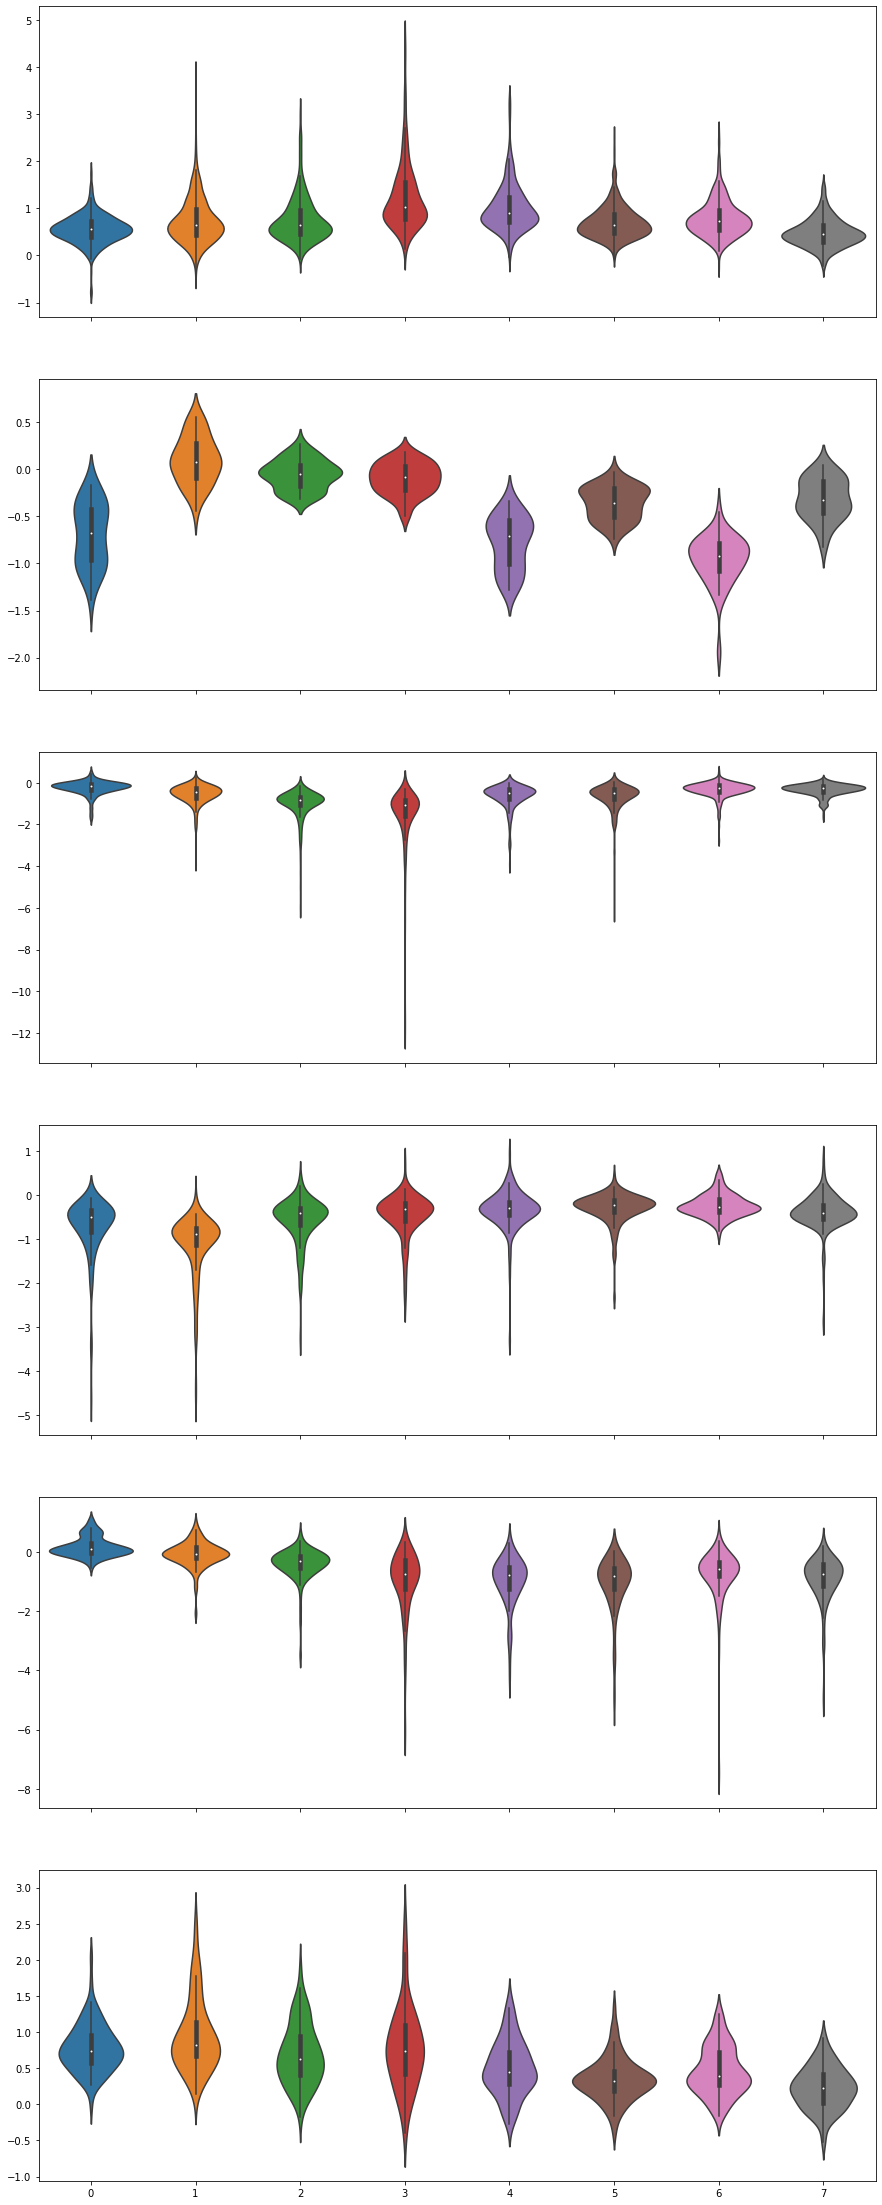

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def lib(FileName):
    def openFile(FileName):
        read_data = open(f'{FileName}')
        data = read_data.read()
        data = data.splitlines()
        read_data.close()
        
        return data
        
    lib = {}
    
    for lines in openFile(FileName):
        line = lines.split()
        if len(line[1:]) == 1:
            lib[int(line[0])] = int(line[1])
        else:
            lib[int(line[0])] = np.array(line[1:]).astype(float)
            
    return lib
            
lib_data = lib('Voorbeeld_clusterdata.txt')
lib_results = lib('Voorbeeld_clusterresult.txt')


def plot_clusters(data, results):
    df_data = pd.DataFrame(data)
    df_data = df_data.transpose()
    clusters = list(results.values())
    max_cluster = max(clusters)
    df_data['cluster'] = clusters
    
    fig, ax=plt.subplots(ncols=1,nrows=max_cluster+1,figsize=(15,40),sharex=True)
    
    for cluster in range(df_data['cluster'].max()+2):
        df_cluster = df_data[df_data['cluster']==cluster].copy()
        df_cluster = df_cluster.drop('cluster', axis=1)
        df_cluster = df_cluster.astype(float)
        list_column_names = list(df_cluster.columns)
        sns.violinplot(data=df_cluster, ax=ax[cluster-1])
    

plot_clusters(lib_data, lib_results)

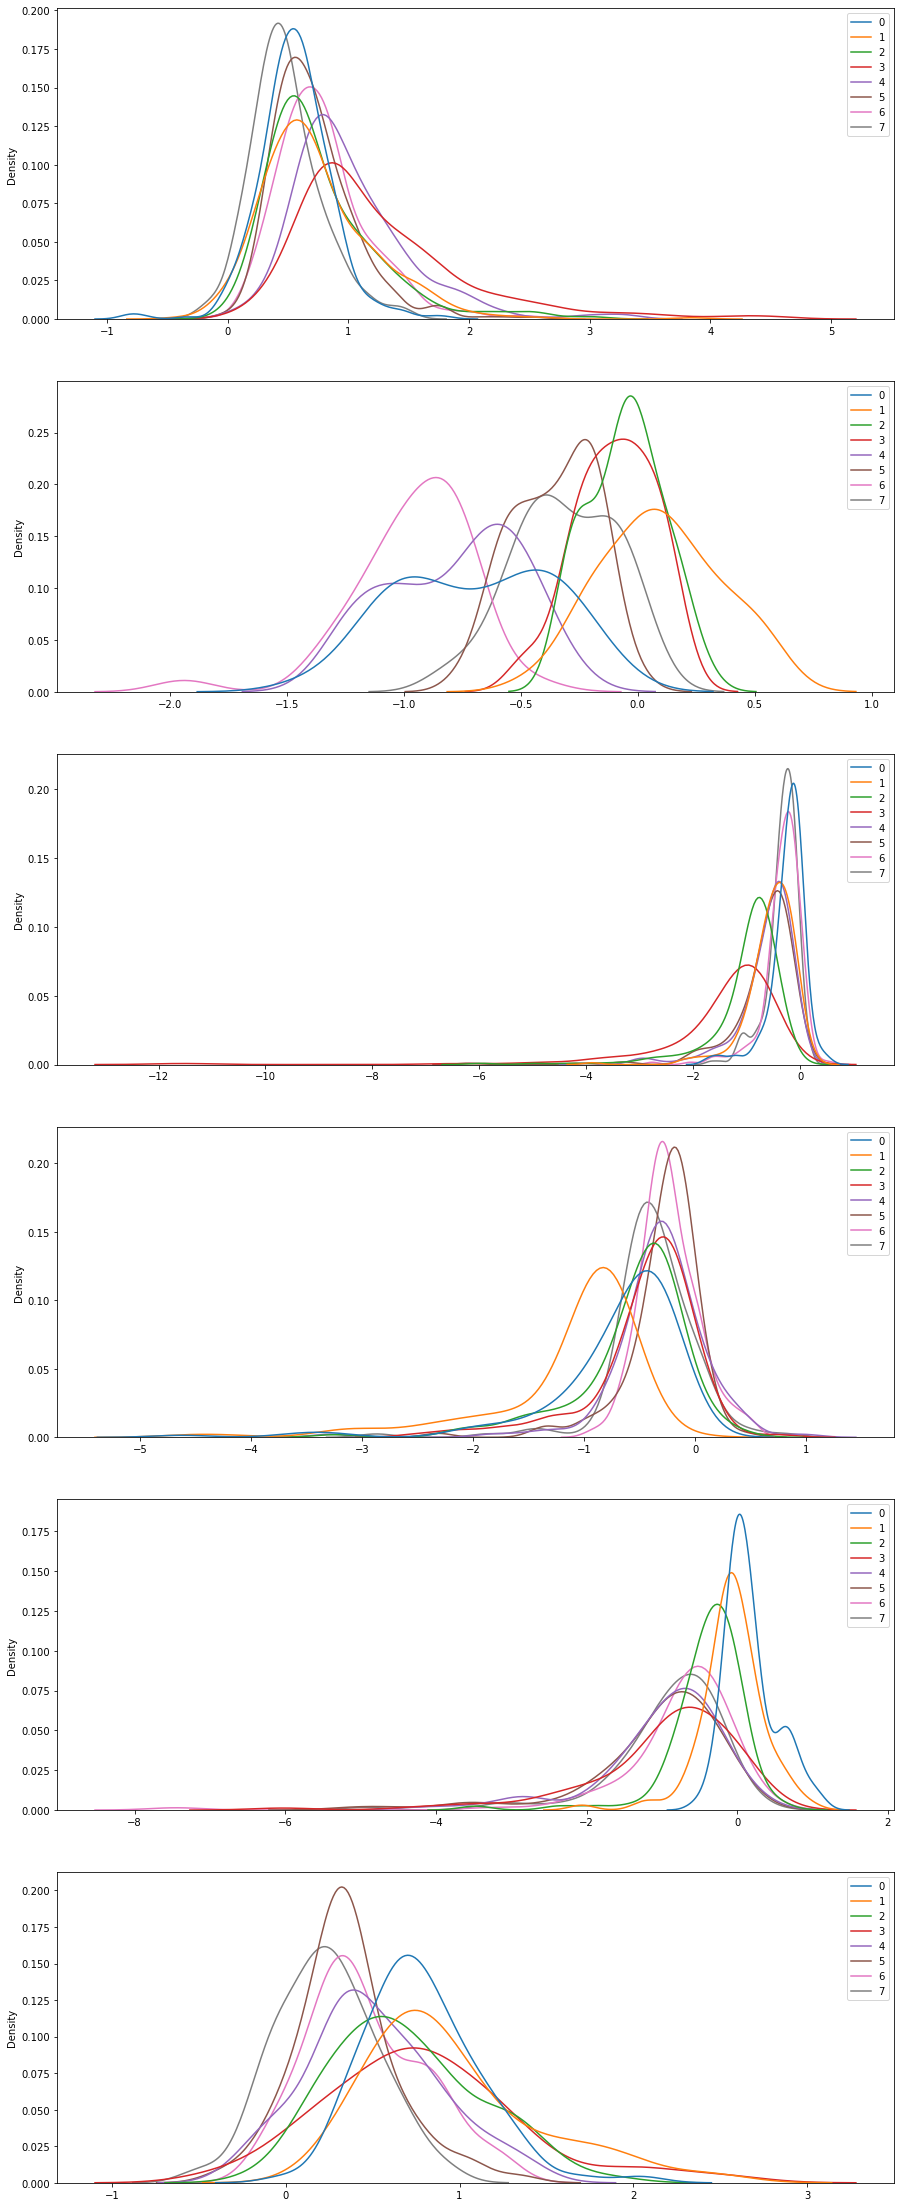

In [2]:
def plot_clusters(data, results, cum=False):
    df_data = pd.DataFrame(data)
    df_data = df_data.transpose()
    clusters = list(results.values())
    max_cluster = max(clusters)
    df_data['cluster'] = clusters
    
    fig, ax=plt.subplots(ncols=1,nrows=max_cluster+1,figsize=(15,40))
    
    for cluster in range(df_data['cluster'].max()+2):
        df_cluster = df_data[df_data['cluster']==cluster].copy()
        df_cluster = df_cluster.drop('cluster', axis=1)
        df_cluster = df_cluster.astype(float)
        list_column_names = list(df_cluster.columns)
        sns.kdeplot(data=df_cluster, ax=ax[cluster-1],cumulative=cum)
    

plot_clusters(lib_data, lib_results)

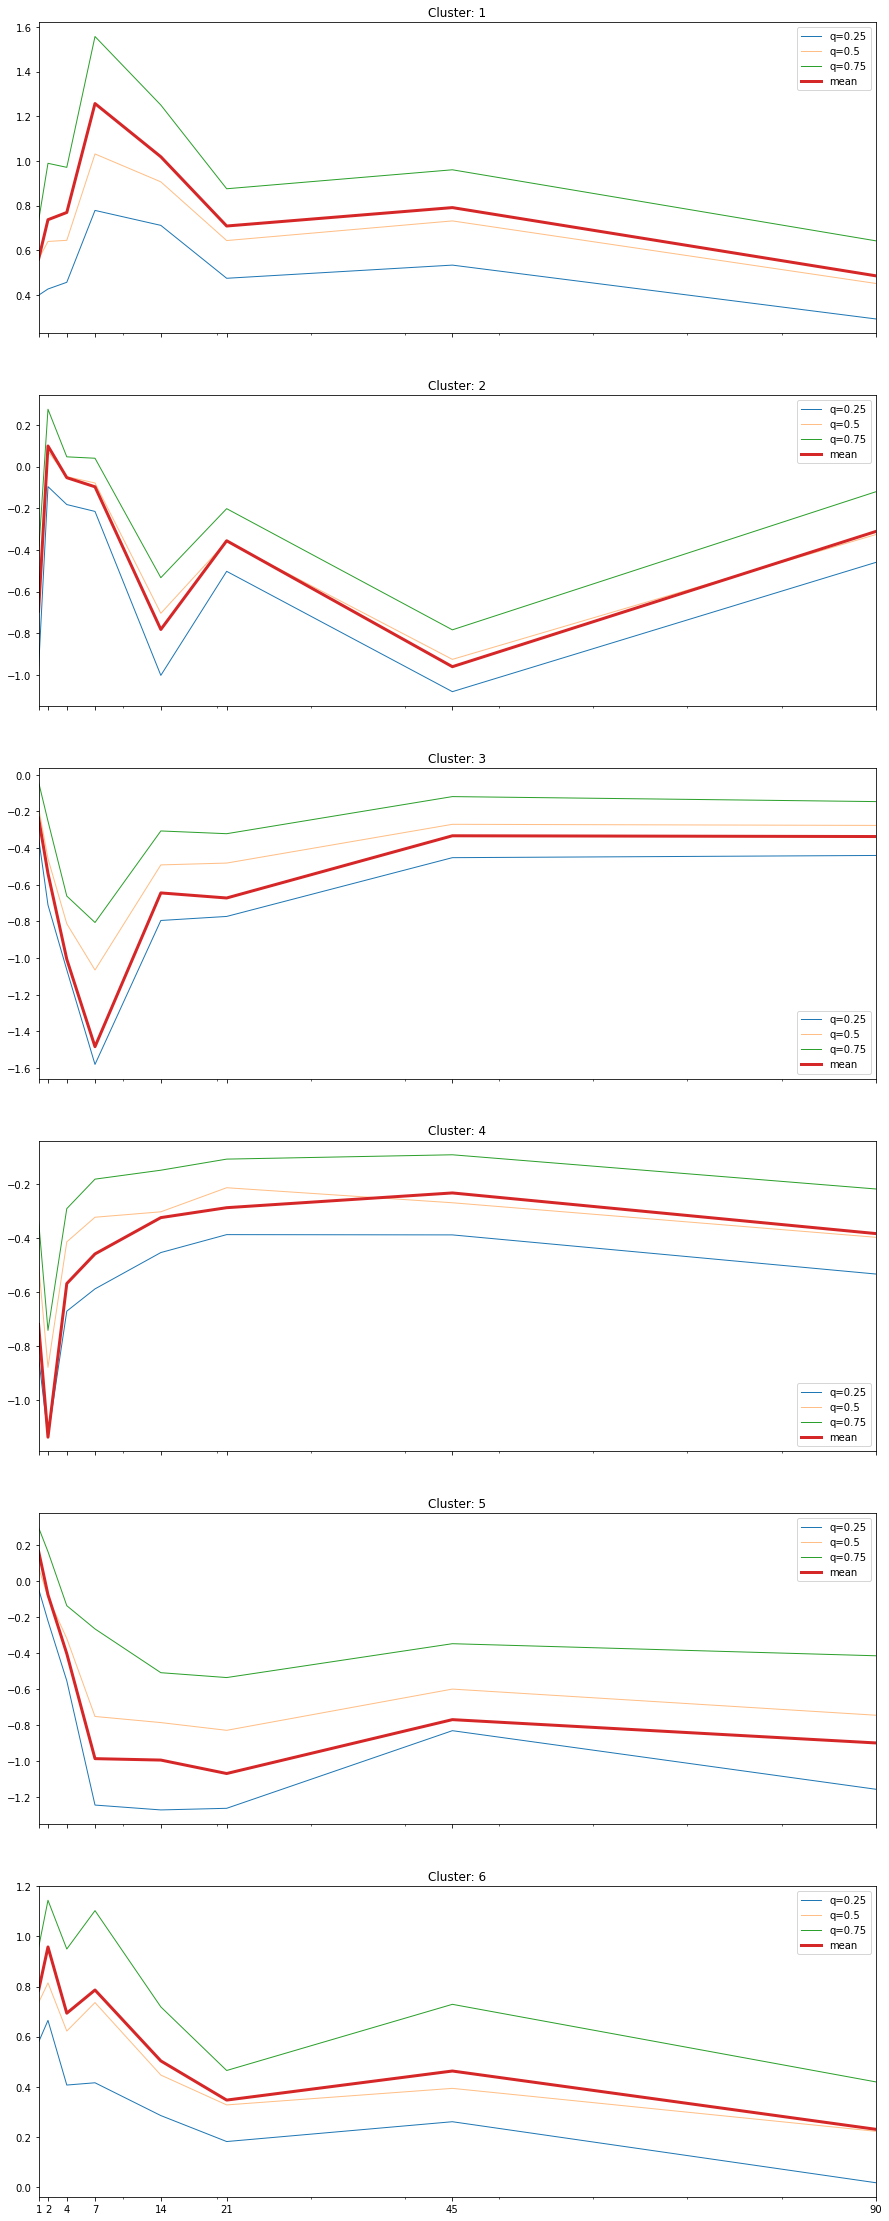

In [3]:
def plot_clusters(data, results):    
    df_data = pd.DataFrame(data)
    days = [1,2,4,7,14,21,45,90] # --> moet geimporteerd worden
    new_cols = {i:days[i] for i in df_data.index}
    df_data = df_data.transpose().rename(columns=new_cols)
    clusters = list(results.values())
    max_cluster = max(clusters)
    df_data['cluster'] = clusters
    
    df_grouped = df_data.groupby('cluster')
    lower_bound = df_grouped.quantile(q=0.25) # maak eventueel variabel als dit nodig is
    higher_bound = df_grouped.quantile(q=0.75) # maak eventueel variabel als dit nodig is
    middle_bound = df_grouped.quantile(q=0.5) # maak eventueel variabel als dit nodig is
    mean = df_grouped.mean()
    fig, ax=plt.subplots(ncols=1,nrows=max_cluster+1,figsize=(15,40),sharex=True)
    
    for cluster in mean.index:
        lower_bound.loc[cluster].plot(ax=ax[cluster-1], alpha=1, linewidth=1)
        middle_bound.loc[cluster].plot(ax=ax[cluster-1], alpha=0.5, linewidth=1)
        higher_bound.loc[cluster].plot(ax=ax[cluster-1], alpha=1, linewidth=1)
        mean.loc[cluster].plot(ax=ax[cluster-1], alpha=1, linewidth=3)
        ax[cluster-1].legend(['q=0.25','q=0.5','q=0.75','mean'])
        if cluster == 0:
            cluster = mean.index[-1] + 1
        ax[cluster-1].set_title(f'Cluster: {cluster}')
        ax[cluster-1].set_xticks(days)
        ax[cluster-1].set_xlim(days[0],days[-1])
        
plot_clusters(lib_data, lib_results)